## Data Load and Split

In [1]:
import numpy as np



data = np.loadtxt("training.txt")
test_data = np.loadtxt("test.txt")
print(data.shape)

#shuffling the data
np.random.shuffle(data)

#spliting Data
train_x = data[:,0:2]
train_y = data[:,-1]
print("train_x shape:"+str(train_x.shape))
print("train_y shape:"+str(train_y.shape))

val_x = test_data[:,0:2]
val_y = test_data[:,-1]
print("val_x shape:"+str(val_x.shape))
print("val_y shape:"+str(val_y.shape))



(1000, 3)
train_x shape:(1000, 2)
train_y shape:(1000,)
val_x shape:(3000, 2)
val_y shape:(3000,)


## Creating functions and Class

In [2]:
#actiavtion function
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

In [3]:
#fully conneted network
class ann:
    def __init__(self, input_size, hidden_size,output_size):
        #setting the shape of the layer and putting random inital value 
        self.params = {}
        self.params['W1'] = np.random.random((input_size,hidden_size))
        self.params['W2'] = np.random.random((hidden_size,output_size))
        
        #params for adagrad
        self.params["G1"] = np.random.random((8,2))
        self.params["G2"] = np.random.random((8,))
        
    #Calculating the Values
    def gradient(self, x, y):
        
        #forward
        W1,W2 = self.params['W1'],self.params['W2']
        U = np.dot(x,W1)
        H = sigmoid(U)
        
        U2 = np.dot(H,W2)
        Y = sigmoid(U2)
        
        #backpropagation
        
        ERR2 = (Y-y)*Y*(1-Y)
        ERR = np.dot((ERR2 * W2),np.dot(H,1-H))
        
        return ERR,ERR2,H,Y
    
    #for prediction after each epoch
    def predict(self, x):
        W1, W2 = self.params['W1'],self.params['W2']
        U = np.dot(x,W1)
        H = sigmoid(U)
        
        U2 = np.dot(H,W2)
        Y = sigmoid(U2)
        return Y
    

## [1] Loss and Validation Graph
- After 20 epochs, both train and test loss have decreased dramatically
- Normally, test loss doesn't exactly match the train loss due to "OVERFITTING" 
- It seems there is no OVERFITTING, since the data is Simple

In [4]:
#fix seeds
np.random.random(3)
n_network = ann(input_size = 2,hidden_size = 8,output_size = 1)

#checking the created network shape
print(n_network.params['W1'].shape)
print(n_network.params['W2'].shape)

(2, 8)
(8, 1)


In [5]:
#setting the hyperparamter
epoch = 500
batch_size = 1
n_iterations =int(train_x.shape[0] / batch_size)
print(n_iterations)
learning_rate = 0.01

1000


In [6]:
eight_epoch_loss = []
eight_val_loss_epoch =[]
for i in range(epoch):
    #iter_loss = []
    predict_y = []
    for j in range(n_iterations):
        
        ERR,ERR2,H,Y = n_network.gradient(train_x[j],train_y[j])
        
        #UPDATING Params "W1,W2"
        n_network.params['W1'] -= (learning_rate * ERR * train_x[j]).T
        n_network.params['W2'] -= np.reshape(learning_rate * ERR2 * H, (8,1))
        predict_y.append(Y)
        
        #val loss
        #v_pre_y = n_network.predict(train_x)
        
    #train Loss
    predict_y = n_network.predict(train_x)
    loss = np.mean(((train_y - np.reshape(predict_y, (1000, )))**2)/2)
    eight_epoch_loss.append(loss)
    
    #val Loss
    t_predict_y = n_network.predict(val_x)
    val_loss = np.mean(((val_y - np.reshape(t_predict_y, (3000, )))**2)/2)
    eight_val_loss_epoch.append(val_loss)
    

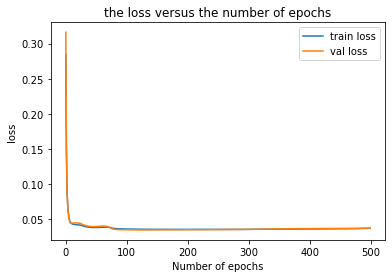

In [7]:
from matplotlib import pyplot as plt
plt.plot(eight_epoch_loss,label ='train loss')
plt.plot(eight_val_loss_epoch,label = 'val loss')

plt.title("the loss versus the number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## [2] EPOCH in different hidden layer
- Since the random value(W1, W2) makes it hard to see the difference among "Number of hidden layer", i imported random seed
- it seems that loss get simliar even though they have different hidden layers
- i thought loss will decrease quickly in higher hidden layer setting, but it didnt
- the Graph changes in different seed, but eventually ends with simliar loss

In [8]:
h_layer = [i for i in range(2,17)]
loss_hidden = np.zeros((len(h_layer),100))
for hidden_layer in h_layer:
    n_network = ann(input_size = 2,hidden_size = hidden_layer,output_size = 1)

    #checking the created network
    print("===================================================================")
    print("======================== HIDDEN_SIZE = %d ========================="%hidden_layer)
    print("===================================================================")
    #fix seed
    np.random.random(30)
    #setting the hyperparamter
    epoch = 100
    batch_size = 1
    n_iterations =int(train_x.shape[0] / batch_size)
    learning_rate = 0.01
    
    epoch_loss = []
    val_loss_epoch =[]
    for i in range(epoch):
        #iter_loss = []
        predict_y = []
        for j in range(n_iterations):
        
            ERR,ERR2,H,Y = n_network.gradient(train_x[j],train_y[j])
        
            #UPDATING Params "W1,W2"
            n_network.params['W1'] -= (learning_rate * ERR * train_x[j]).T
            n_network.params['W2'] -= np.reshape(learning_rate * ERR2 * H, (hidden_layer,1))
            predict_y.append(Y)
        #train Loss
        predict_y = n_network.predict(train_x)
        loss = np.mean(((train_y - np.reshape(predict_y, (1000, )))**2)/2)
        epoch_loss.append(loss)
         
        #val Loss
        #t_predict_y = n_network.predict(val_x)
        #val_loss = np.mean(((val_y - np.reshape(t_predict_y, (3000, )))**2)/2)
        #val_loss_epoch.append(val_loss)
    
    #plt.plot(val_loss_epoch,label = 'val loss')
    loss_hidden[hidden_layer-2] = epoch_loss
    

======================== HIDDEN_SIZE = 2 =========================
======================== HIDDEN_SIZE = 3 =========================
======================== HIDDEN_SIZE = 4 =========================
======================== HIDDEN_SIZE = 5 =========================
======================== HIDDEN_SIZE = 6 =========================
======================== HIDDEN_SIZE = 7 =========================
======================== HIDDEN_SIZE = 8 =========================
======================== HIDDEN_SIZE = 9 =========================
======================== HIDDEN_SIZE = 10 =========================
======================== HIDDEN_SIZE = 11 =========================
======================== HIDDEN_SIZE = 12 =========================
======================== HIDDEN_SIZE = 13 =========================
======================== HIDDEN_SIZE = 14 =========================
======================== HIDDEN_SIZE = 15 =========================
======================== HIDDEN_SIZE = 16 ==============

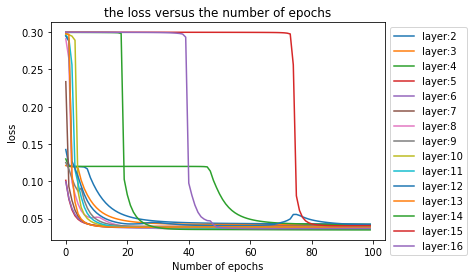

In [9]:
from matplotlib import pyplot as plt
for i in h_layer:
    plt.plot(loss_hidden[i-2],label = 'layer:%d'%i) 
plt.title("the loss versus the number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## [3] Adaptive Gradient optimizer 
- The loss graph with using Adagrad have round curve compare to SGD 
- since Adagrad controls learning rate value, the loss decreases slower than normal
- But, it seems to be more stable (SGD Loss sometimes get higher in later epoch  

In [10]:
#fix seeds
np.random.random(3)
n_network = ann(input_size = 2,hidden_size = 8,output_size = 1)

#checking the created network shape
print(n_network.params['W1'].shape)
print(n_network.params['W2'].shape)

(2, 8)
(8, 1)


In [11]:
#setting the hyperparamter
np.random.random(3)
epoch = 500
batch_size = 1
n_iterations =int(train_x.shape[0] / batch_size)
print(n_iterations)
learning_rate = 0.01

1000


In [12]:
e = 0.000001
print(e)
a_epoch_loss = []
a_val_loss_epoch =[]
for i in range(epoch):
    for j in range(n_iterations):
        #print(n_network.params)

        ERR,ERR2,H,Y = n_network.gradient(train_x[j],train_y[j])
        
        grad1 = ERR * train_x[j]
        grad2 = ERR2 * H

        #Updating params G1, G2
        n_network.params['G1'] += grad1**2
        n_network.params['G2'] += grad2**2
        
        #UPDATING Params "W1,W2" with adagrad
        n_network.params['W1'] -= (learning_rate * grad1 / (np.sqrt(n_network.params['G1'])+e)).T
        n_network.params['W2'] -= np.reshape(learning_rate *grad2, (8,1))
        
        
        
    #train Loss
    predict_y = n_network.predict(train_x)
    loss = np.mean(((train_y - np.reshape(predict_y, (1000, )))**2)/2)
    a_epoch_loss.append(loss)
    
    #val Loss
    t_predict_y = n_network.predict(val_x)
    val_loss = np.mean(((val_y - np.reshape(t_predict_y, (3000, )))**2)/2)
    a_val_loss_epoch.append(val_loss)
    

1e-06


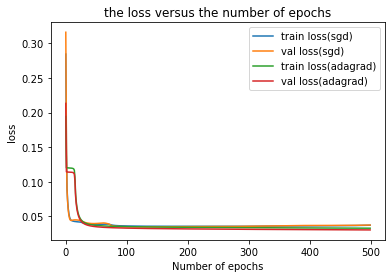

In [13]:
from matplotlib import pyplot as plt
plt.plot(eight_epoch_loss,label ='train loss(sgd)')
plt.plot(eight_val_loss_epoch,label = 'val loss(sgd)')

plt.plot(a_epoch_loss,label ='train loss(adagrad)')
plt.plot(a_val_loss_epoch,label = 'val loss(adagrad)')


plt.title("the loss versus the number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()